<a href="https://colab.research.google.com/github/akkipant/CS5590-490-PYTHON-AND-DEEP-LEARNING-PROJECT/blob/master/Source/Python_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests

print('Beginning file download with requests')

url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3486/31310/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1588274091&Signature=Hq%2B5HJVufUNpCi91UP95uzGsIyaPgqrurD91ps3eCiEkb%2F1I3buFe242LTnqEDFiXM2YYvFrkssSnAqYOLgVH1IaU4u%2BF1dSh5nXtDZfPRjIEmimA7ljeBFHVXmDgcPc7Bpa0DDaFs1Fmf2gL53F7Wm0ltL42LHaxBFT2pR5B2MT9qM86Su69qVAwDdYCfMWS8nES8Hu4aEf3LXABZJBOCRMw03WaRey%2FlZjrkoq53IxSZ%2BUxflr11incKB1VCR7QVaTrjovot7XRaHXCNABiXMI0zYuhJhQXaO6jq10Xn1h54PDjkSwxmilKM0OoTiASCi%2FyjEzWGaSOPZ%2Fmrr%2Fhg%3D%3D&response-content-disposition=attachment%3B+filename%3Dfacial-keypoints-detection.zip'
r = requests.get(url)

with open('data.zip', 'wb') as f:
    f.write(r.content)

# Retrieve HTTP meta-data
print(r.status_code)
print(r.headers['content-type'])
print(r.encoding)

Beginning file download with requests
200
application/zip
None


In [0]:
from zipfile import ZipFile
# Create a ZipFile Object and load sample.zip in it
with ZipFile('data.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('/content')

In [0]:
from zipfile import ZipFile
# Create a ZipFile Object and load sample.zip in it
with ZipFile('/content/training.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('/content')

In [0]:
from zipfile import ZipFile
# Create a ZipFile Object and load sample.zip in it
with ZipFile('/content/test.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('/content')

# **Increment 1**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid


# define the show_facial_keypoints function
def show_facial_keypoints(images, keypoints, index):
    facial_keypoints = plt.imshow(images[index], cmap='gray')
    for i in range(15):
        plt.plot(keypoints.loc[index][2 * i], keypoints.loc[index][2 * i + 1], 'ro')
    return facial_keypoints

# check null and remove them
def null_remove(train_data):
    # check null values
    print('\nCount the null value in the train data: ')
    print(train_data.isnull().any().describe())

    # drop the na value
    train_data = train_data.dropna()
    print('\nAfter dropping the null value, Count the null value in the train data: ')
    print(train_data.isnull().any().describe())

    print('\nCount the null value in the test data: ')
    print(test_data.isnull().any().describe())
    print('\nCount the null value in the ID Lookup Table: ')
    print(IdLookupTable.isnull().any().describe())
    return train_data


# Load data
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('test.csv')
IdLookupTable = pd.read_csv('IdLookupTable.csv')

# remove null values
null_remove(train_data)

# Explore data
print('The shape of train data : ', train_data.shape)
print('The shape of test data : ', test_data.shape)

print(train_data.head())
print(train_data.columns.values)

# Split the train data into train_images and train_keyPoints
train_images = train_data['Image']
train_labels = train_data.drop(['Image'], axis=1)

# explore the train_images and train_keyPoints
number_of_pixels = len(train_images[0].split(' '))
print('Number of pixels in each image: ', number_of_pixels)
height = width = int(number_of_pixels ** (1 / 2.0))

# Reshape image to height = 96px width = 96px
print(train_images.shape)
print(train_images.head())
train_images = train_images.apply(lambda pixel: np.fromstring(pixel, sep=' ').reshape((height, width)))

# scale data
train_images /= 255.0
print(train_images.head())

# plot the first image
plt.imshow(train_images[0], cmap='gray')
plt.show()


# plot the first image with Facial Keypoints
show_facial_keypoints(train_images, train_labels, 0)
plt.show()

# **Increment 2**

The shape of train data :  (7049, 31)
The shape of test data :  (1783, 2)
   left_eye_center_x  ...                                              Image
0          66.033564  ...  238 236 237 238 240 240 239 241 241 243 240 23...
1          64.332936  ...  219 215 204 196 204 211 212 200 180 168 178 19...
2          65.057053  ...  144 142 159 180 188 188 184 180 167 132 84 59 ...
3          65.225739  ...  193 192 193 194 194 194 193 192 168 111 50 12 ...
4          66.725301  ...  147 148 160 196 215 214 216 217 219 220 206 18...

[5 rows x 31 columns]
['left_eye_center_x' 'left_eye_center_y' 'right_eye_center_x'
 'right_eye_center_y' 'left_eye_inner_corner_x' 'left_eye_inner_corner_y'
 'left_eye_outer_corner_x' 'left_eye_outer_corner_y'
 'right_eye_inner_corner_x' 'right_eye_inner_corner_y'
 'right_eye_outer_corner_x' 'right_eye_outer_corner_y'
 'left_eyebrow_inner_end_x' 'left_eyebrow_inner_end_y'
 'left_eyebrow_outer_end_x' 'left_eyebrow_outer_end_y'
 'right_eyebrow_inner_end_x' 'ri

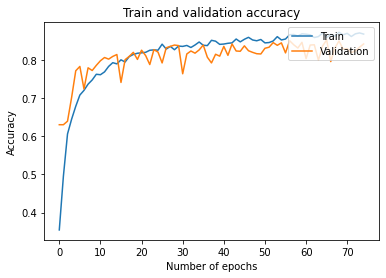

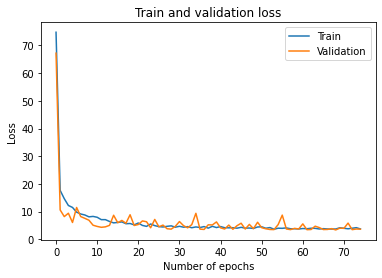

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras import Sequential
from keras.layers import Dense
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.constraints import maxnorm
from keras.optimizers import SGD

# plot keypoints on the image
def plot_keypoints(image, keypoint, axis, orig):
    if orig is True:
      col = 'yo'
      t = ' Predicted'
    else:
      col = 'ro'
      t = ' Real'
    
    image = image.reshape(96,96)
    axis.imshow(image, cmap='gray')
    axis.plot(keypoint[0::2], keypoint[1::2], col)
    plt.title(t)


# check null and remove them
def null_remove(train_data):
    # check null values
    print('\nCount the null value in the train data: ')
    print(train_data.isnull().any().describe())

    # drop the na value
    train_data = train_data.dropna()
    print('\nAfter dropping the null value, Count the null value in the train data: ')
    print(train_data.isnull().any().describe())

    print('\nCount the null value in the test data: ')
    print(test_data.isnull().any().describe())
    print('\nCount the null value in the ID Lookup Table: ')
    print(IdLookupTable.isnull().any().describe())
    return train_data

def fill_null(train_data):
    return  train_data.fillna(method = 'ffill')

# create a cnn model
def cnn_model(epochs):
    # Create the model
    model = Sequential()

    # Input dimensions: (None, 96, 96, 1)
    model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    # Input dimensions: (None, 96, 96, 32)
    model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Input dimensions: (None, 48, 48, 32)
    model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    # Input dimensions: (None, 48, 48, 64)
    model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Input dimensions: (None, 24, 24, 64)
    model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    # Input dimensions: (None, 24, 24, 96)
    model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Input dimensions: (None, 12, 12, 96)
    model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    # Input dimensions: (None, 12, 12, 128)
    model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Input dimensions: (None, 6, 6, 128)
    model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    # Input dimensions: (None, 6, 6, 256)
    model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Input dimensions: (None, 3, 3, 256)
    model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    # Input dimensions: (None, 3, 3, 512)
    model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())

    # Input dimensions: (None, 3, 3, 512)
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(30))
    model.summary()
    lrate = 0.01
    decay = lrate / epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    # model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])
    model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    return model


# Load data
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('test.csv')
IdLookupTable = pd.read_csv('IdLookupTable.csv')

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# remove null values
#train_data = null_remove(train_data)
train_data = fill_null(train_data)

# Explore data
print('The shape of train data : ', train_data.shape)
print('The shape of test data : ', test_data.shape)

print(train_data.head())
print(train_data.columns.values)

# Split the train data into images and labels
images = train_data['Image']
labels = train_data.drop(['Image'], axis=1)
labels = labels.to_numpy()

# explore the train_images and train_keyPoints
number_of_pixels = len(images[0].split(' '))
print('Number of pixels in each image: ', number_of_pixels)
height = width = int(number_of_pixels ** (1 / 2.0))

# Reshape image to height = 96px width = 96px
print(images.shape)
print(images.head())
images = np.vstack(images.apply(lambda x: np.fromstring(x, dtype=float, sep=' ')).values).reshape(
    images.shape[0], height, width, 1)

# scale data
images /= 255.0

# split train data and validation data
print(images.shape)
print(labels.shape)
images_train, images_val, labels_train, labels_val = train_test_split(
    images, labels, random_state=42, test_size=.2)
print('The shape of train image: ', images_train.shape)
print('The shape of train label: ', labels_train.shape)
print('The shape of validation image: ', images_val.shape)
print('The shape of validation label: ', labels_val.shape)

# # Load saved model
# model = load_model('project.h5')

epochs = 75
model = cnn_model(epochs)
print(model.summary())
# Fit the model
history = model.fit(images_train, labels_train, validation_data=(images_val, labels_val), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(images_val, labels_val, verbose=0)

model.save('project_test.h5')
print("Accuracy: %.2f%%" % (scores[1] * 100))
print('Loss:', scores[0])

# Plot the loss and accuracy using history object
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Train and validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train and validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Making predictions using trained model.

In [0]:
test_preds = model.predict(images_val)

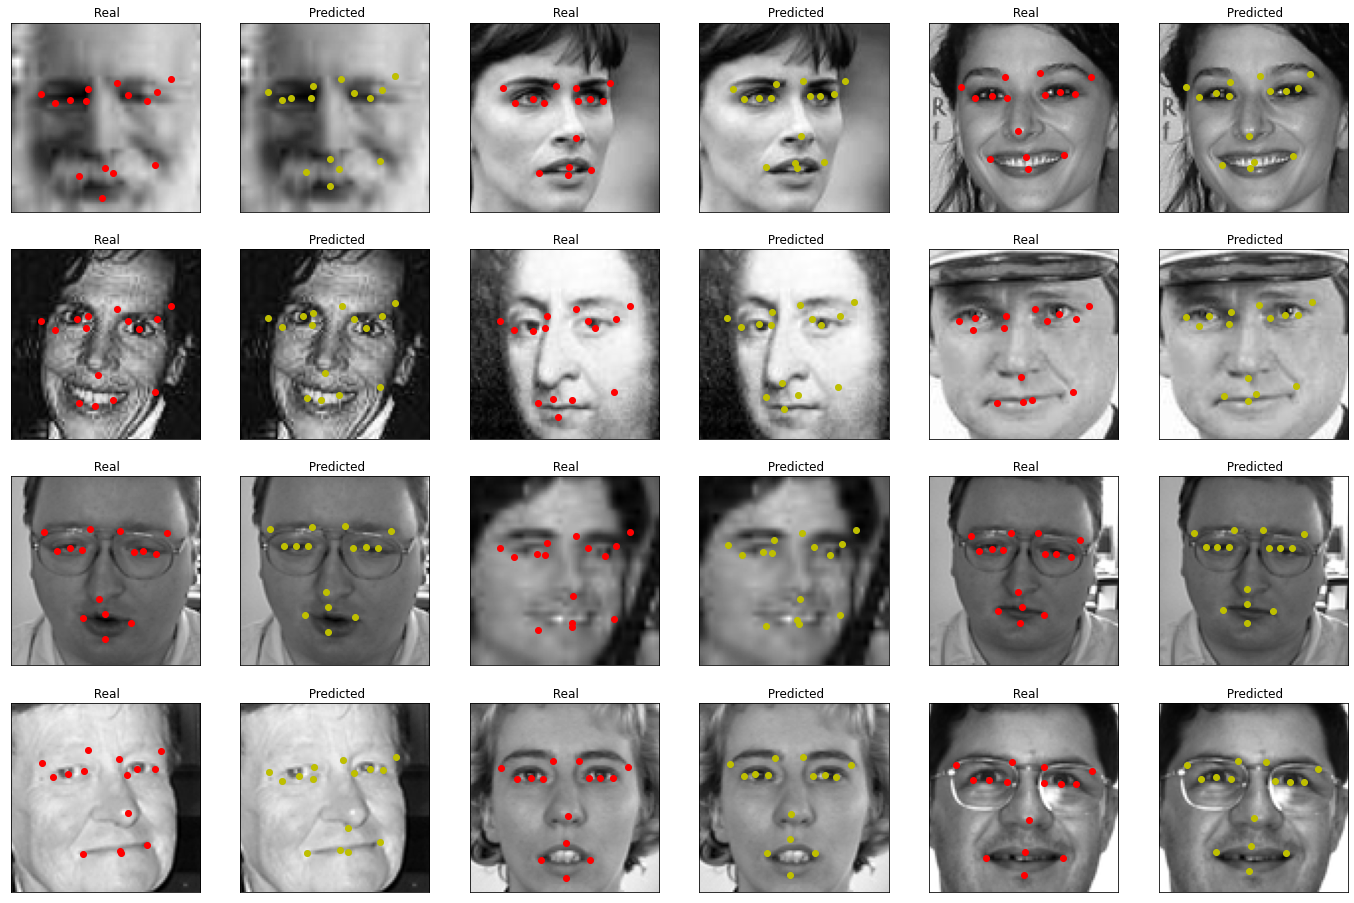

In [19]:
fig = plt.figure(figsize=(24,16))
for i in range(12):
    axis = fig.add_subplot(4, 6, i*2+1, xticks=[], yticks=[])
    plot_keypoints(images_val[i], labels_val[i], axis, False)
    axis = fig.add_subplot(4, 6, i*2+2, xticks=[], yticks=[])
    plot_keypoints(images_val[i], test_preds[i], axis, True)
plt.show()